In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data_balanced.csv')
df_train.head(3)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,"Tanzania, United Republic Of",300,Tanzanian Coffee Board,Arusha,Washed / Wet,7.67,7.5,7.33,7.25,...,7.75,82.83,0.11,0,0.0,Green,5,1400.0,1400.0,excellent
1,Arabica,Brazil,25,NUCOFFEE,Mundo Novo,Semi-washed / Semi-pulped,7.75,7.5,7.58,7.50,...,7.58,83.17,0.12,0,0.0,Blue-Green,3,1000.0,1000.0,excellent
2,Arabica,"Tanzania, United Republic Of",1,Africa Fine Coffee Association,Other,Washed / Wet,7.42,7.5,7.50,7.33,...,7.50,82.08,0.12,0,0.0,Green,3,1500.0,1700.0,excellent


In [3]:
df_test.shape

(322, 24)

In [4]:
df_train.shape

(1244, 25)

In [5]:
# df_train = df_train.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
#        'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'], axis=1)
# df_test = df_test.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
#        'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'],axis=1)

In [6]:
df_train = df_train.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'], axis=1)
df_test = df_test.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'],axis=1)

In [7]:
X_train = df_train.drop(['quality'], axis=1)
X_test = df_test.drop(['quality'], axis=1)

y_train = df_train['quality']
y_test = df_test['quality']

In [8]:
X_test.head(3)

,Species,Number.of.Bags,Processing.Method,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters
0,Arabica,275,Washed / Wet,0.11,0,0.0,Green,1,1650.0,1650.0
1,Arabica,275,Washed / Wet,0.10,0,1.0,Green,8,1396.0,1396.0
2,Arabica,10,Washed / Wet,0.13,0,0.0,Green,3,1170.0,1170.0


In [9]:
stnd = StandardScaler()
X_train_num = X_train.select_dtypes(include='number')
stnd.fit(X_train_num)
X_train_num = pd.DataFrame(stnd.transform(X_train_num),columns=X_train_num.columns)

X_train_cat = X_train.select_dtypes(exclude='number')
X_train_cat = pd.get_dummies(X_train_cat)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train.head(3)

,Number.of.Bags,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,Species_Arabica,Species_Robusta,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
0,1.181856,0.207447,-0.269387,-0.175242,-0.046362,-0.054006,-0.056095,1,0,0,0,0,0,1,0,0,1,0
1,-1.007241,0.454871,-0.269387,-0.175242,-0.325658,-0.087446,-0.089538,1,0,0,0,0,1,0,1,0,0,0
2,-1.198289,0.454871,-0.269387,-0.175242,-0.325658,-0.045646,-0.031012,1,0,0,0,0,0,1,0,0,1,0


In [10]:
stnd = StandardScaler()
X_test_num = X_test.select_dtypes(include='number')
stnd.fit(X_test_num)
X_test_num = pd.DataFrame(stnd.transform(X_test_num),columns=X_test_num.columns)

X_test_cat = X_test.select_dtypes(exclude='number')
X_test_cat = pd.get_dummies(X_test_cat)

X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_test.head(3)

,Number.of.Bags,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,Species_Arabica,Species_Robusta,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
0,0.803782,0.207473,-0.207987,-0.208867,-0.597579,0.000366,-0.004700,1,0,0,0,0,0,1,0,0,1,0
1,0.803782,-0.064097,-0.207987,0.653379,0.265846,-0.041487,-0.046561,1,0,0,0,0,0,1,0,0,1,0
2,-1.066289,0.750615,-0.207987,-0.208867,-0.350886,-0.078727,-0.083807,1,0,0,0,0,0,1,0,0,1,0


In [11]:
y_train.shape

(1244,)

In [12]:
X_train.shape

(1244, 18)

In [13]:
clf = SVC()
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
gamma_sweep = 2.0**np.array(list(range(-15,3)))
gamma_sweep

array([3.05175781e-05, 6.10351562e-05, 1.22070312e-04, 2.44140625e-04,
       4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00])

In [15]:
grid = {'gamma': gamma_sweep, 'kernel': ['rbf']}
clfCV = GridSearchCV(clf,param_grid=grid,return_train_score=True,n_jobs=-1,verbose=3)
clfCV.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': array([3.05175781e-05, 6.10351562e-05, 1.22070312e-04, 2.44140625e-04,
       4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00]),
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [16]:
clfCV.best_params_['gamma']

4.0

In [17]:
print('         best gamma',clfCV.best_params_)
print('  validation R2 =',clfCV.best_score_.round(3))

         best gamma {'gamma': 4.0, 'kernel': 'rbf'}
  validation R2 = 0.869


In [18]:
clfCV_gamma = SVC(gamma=clfCV.best_params_['gamma'])

In [19]:
C_sweep = 2.0**np.array(list(range(-5,15)))
C_sweep

array([3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01, 5.0000e-01,
       1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04])

In [20]:
grid = {'C': C_sweep, 'kernel': ['rbf']}
clfCV_gamma = GridSearchCV(clfCV_gamma,param_grid=grid,return_train_score=True,n_jobs=-1,verbose=3)
clfCV_gamma.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(gamma=4.0), n_jobs=-1,
             param_grid={'C': array([3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01, 5.0000e-01,
       1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04]),
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [21]:
print(f"         best gamma={clfCV.best_params_['gamma']} and C ={clfCV_gamma.best_params_}")
print('  validation R2 =',clfCV_gamma.best_score_.round(3))

         best gamma=4.0 and C ={'C': 2048.0, 'kernel': 'rbf'}
  validation R2 = 0.945


In [22]:
print('test R2',clfCV_gamma.score(X_test,y_test).round(3))

test R2 0.54


In [23]:
# trying both
grid = {'C': C_sweep, 'gamma': gamma_sweep, 'kernel': ['rbf']}
clfNew = SVC()
clfNew = GridSearchCV(clfNew,param_grid=grid,return_train_score=True,n_jobs=-1,verbose=3)
clfNew.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01, 5.0000e-01,
       1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04]),
                         'gamma': array([3.05175781e-05, 6.10351562e-05, 1.22070312e-04, 2.44140625e-04,
       4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00]),
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [24]:
print(f"best gamma = {clfNew.best_params_['gamma']} and C = {clfNew.best_params_['C']}")
print('validation R2 =',clfNew.best_score_.round(3))

best gamma = 4.0 and C = 2048.0
validation R2 = 0.945


In [25]:
print('test R2',clfNew.score(X_test,y_test).round(3))

test R2 0.54


In [26]:
clfNew_kernel = SVC(gamma=clfNew.best_params_['gamma'],C=clfNew.best_params_['C'])

In [27]:
# trying diff kernels
### TAKES FAR TOO MUCH MEMORY AND 
# grid = {'kernel': ['rbf','poly', 'sigmoid']}
# clfNew_kernel = GridSearchCV(clfNew_kernel,param_grid=grid,return_train_score=True,n_jobs=-1,verbose=3)
# clfNew_kernel.fit(X_train,y_train)

In [28]:
# print(f"best gamma = {clfNew_kernel.best_params_['gamma']} and C = {clfNew_kernel.best_params_['C']} with kernel: {clfNew_kernel.best_params_['kernel']}")
# print('validation R2 =',clfNew.best_score_.round(3))

In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Visualizing Results!

In [31]:
y_fit = clfNew.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

   excellent       0.52      0.88      0.66       161
   very good       0.62      0.20      0.31       161

    accuracy                           0.54       322
   macro avg       0.57      0.54      0.48       322
weighted avg       0.57      0.54      0.48       322



In [33]:
fitted = pd.DataFrame(y_fit)
fitted.value_counts()

excellent    269
very good     53
dtype: int64

Text(89.18, 0.5, 'predicted label')

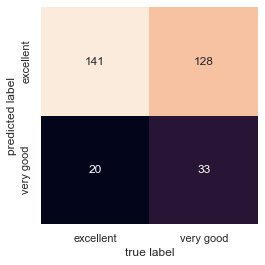

In [34]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit,labels=['excellent','very good'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['excellent','very good'],
            yticklabels=['excellent','very good'])
plt.xlabel('true label')
plt.ylabel('predicted label')